# Analyzing circuits

In this section, we will learn how to interpret the data that we collect from our circuits. 

### Accounting for grating couplers
Whenever data is obtained with a grating coupler, it is important to remember that the grating coupler is rensponsive to changes in wavelength as well as the circuit being tested. In order to properly interpret the data, we must first deembed the wavelength dependence of the grating coupler. This can be done in a variety of ways, including curve fitting or using a reference circuit. 

Consider the following data collected via a wavelength sweep:

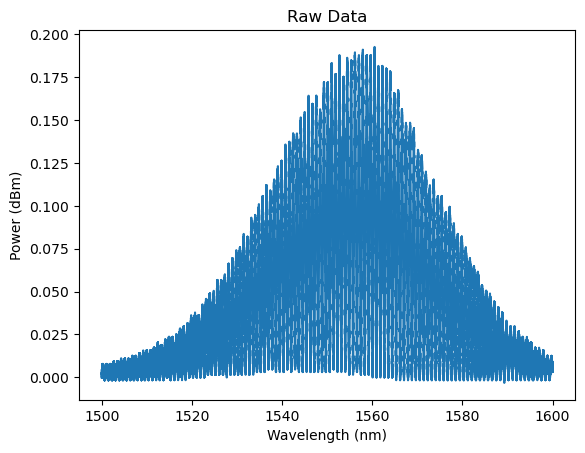

In [28]:
import numpy as np
import matplotlib.pyplot as plt

POLY_ORDER = 4

data = np.load('../files/oscope_data.npz')
wavelength = data['wavelength']
power = data['power']

# Here is the raw data from the oscilloscope
plt.plot(wavelength, power)
plt.title('Raw Data')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Power (dBm)')
plt.show()

The parabolic shape of the graph is due to the grating coupler's responsivity to wavelength, which obfuscates the data from the circuit we are trying to analyze. In order to remove this effect, we curve fit the data to a parabola and subtract it from the data. 


### Curve fitting

In order to fit a curve to the data, we must first define a function that we want to fit to the data. In this case, we will use a parabola of order 4.

In [29]:
def model_parabola(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

Now, we just need to optimize the parameters of the function to fit the data. We can do this using the `curve_fit` function from `scipy.optimize`. This function takes in the function we want to fit to the data, the x and y data, and an initial guess for the parameters. It returns the optimized parameters and the covariance matrix.

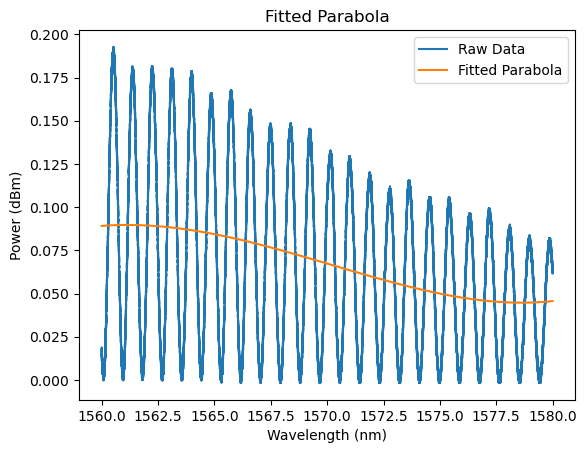

In [30]:
from scipy.optimize import curve_fit

start, end = np.argmax(wavelength > 1560), np.argmax(wavelength > 1580)
wavelength = wavelength[start:end]
power = power[start:end]

# It can be helpful in terms of speed and accuracy to add an initial guess for the optimal parameters
# This is especially true for more complicated models with more
initial_guess = [1, 1, 1, 1, 1]
optimal_parameters, covariance_matrix = curve_fit(model_parabola, wavelength, power, initial_guess) 
fit = model_parabola(wavelength, *optimal_parameters)

# Here is the data with the fitted parabola
plt.plot(wavelength, power, label='Raw Data')
plt.plot(wavelength, fit, label='Fitted Parabola')
plt.title('Fitted Parabola')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Power (dBm)')
plt.legend()
plt.show()


Now, we simply subtract the curve fit from the data to obtain the data from the circuit and add an offset to the data to make it easier to see.

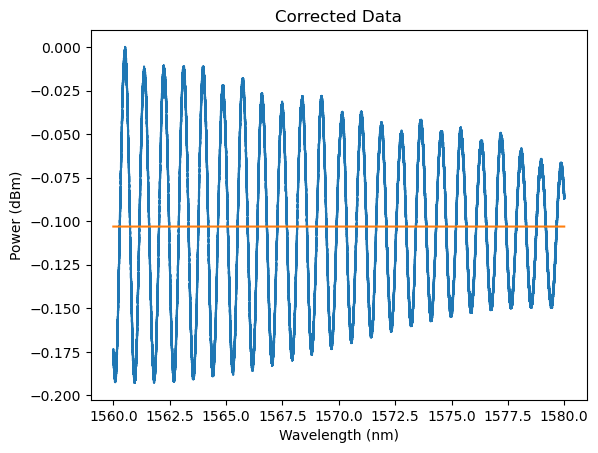

In [32]:
power_corrected = power - fit
power_corrected = power_corrected + np.max(fit) - np.max(power)

plt.plot(wavelength, power_corrected)
plt.title('Corrected Data')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Power (dBm)')

plt.plot(wavelength, np.ones((len(wavelength), 1)) * np.average(power_corrected))

plt.show()


### Using a reference circuit

### Extracting the index of refraction